In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,datetime,loc_CO2,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices,count_total
0,2017-03-25 09:05:58,Georgetown-manual,22.6,36.9,781.0,430.0,511.0,1.0,NaN,0.0
1,2017-03-25 09:06:04,Georgetown-manual,23.8,39.0,767.0,448.0,510.0,8.0,NaN,0.0
2,2017-03-25 09:06:10,Georgetown-manual,23.8,39.0,754.0,423.0,511.0,8.0,NaN,0.0
3,2017-03-25 09:06:15,Georgetown-manual,23.8,39.0,768.0,412.0,492.0,8.0,NaN,0.0
4,2017-03-25 09:06:21,Georgetown-manual,23.8,39.0,758.0,428.0,491.0,9.0,NaN,0.0


In [5]:
dataset = dataset.dropna()
dataset.head()

,datetime,loc_CO2,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices,count_total
8089,2017-04-08 08:58:39,Georgetown,-999.0,-999.0,2.0,163.0,528.0,45.0,39.0,0.0
8090,2017-04-08 08:58:44,Georgetown,21.8,24.1,792.0,174.0,521.0,47.0,41.0,0.0
8091,2017-04-08 08:58:50,Georgetown,21.8,23.8,776.0,178.0,513.0,47.0,41.0,0.0
8092,2017-04-08 08:58:55,Georgetown,21.8,23.8,763.0,151.0,535.0,49.0,43.0,0.0
8093,2017-04-08 08:59:00,Georgetown,21.8,24.1,776.0,174.0,523.0,49.0,43.0,0.0


In [6]:
corrmat = dataset.corr()
corrmat

,temperature,humidity,co2,light,noise,bluetooth_devices,bluetooth_non_personal_devices,count_total
temperature,1.000000,0.824692,0.105699,0.001240,-0.027289,0.032585,0.032387,0.015682
humidity,0.824692,1.000000,0.224732,0.003282,-0.291073,0.182104,0.182781,-0.041914
co2,0.105699,0.224732,1.000000,0.005913,-0.108970,0.553870,0.549037,0.538086
light,0.001240,0.003282,0.005913,1.000000,0.001459,0.002910,0.002935,-0.012736
noise,-0.027289,-0.291073,-0.108970,0.001459,1.000000,-0.146856,-0.147968,0.104358
bluetooth_devices,0.032585,0.182104,0.553870,0.002910,-0.146856,1.000000,0.999912,0.106218
bluetooth_non_personal_devices,0.032387,0.182781,0.549037,0.002935,-0.147968,0.999912,1.000000,0.099118
count_total,0.015682,-0.041914,0.538086,-0.012736,0.104358,0.106218,0.099118,1.000000


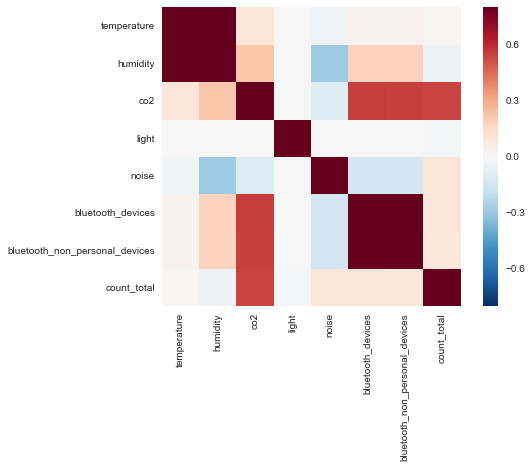

In [7]:
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [8]:
#multiple regression using count_total as y
x = dataset[['temperature','humidity','co2','light','noise','bluetooth_devices','bluetooth_non_personal_devices']]
y = dataset['count_total']

## fit a OLS model 
x = sm.add_constant(x)
result = smf.ols('count_total ~ temperature + humidity + co2 + light + noise + bluetooth_devices + bluetooth_non_personal_devices', data=output1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            count_total   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1237.
Date:                Sat, 29 Apr 2017   Prob (F-statistic):               0.00
Time:                        15:17:42   Log-Likelihood:                -33596.
No. Observations:                9873   AIC:                         6.721e+04
Df Residuals:                    9865   BIC:                         6.727e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                        -40.9641      1.247    -32.841      0.000       -43.409   -38.519
temperature                        0.1392      0.014      9.919      0.000         0.112     0.167
humidity                          -0.1725      0.012    -14.443      0.000        -0.196    -0.149
co2                                0.0468      0.001     54.696      0.000         0.045     0.048
light                          -8.548e-07   4.35e-07     -1.964      0.050     -1.71e-06 -1.66e-09
noise                              0.0123      0.002      6.376      0.000         0.008     0.016
bluetooth_devices                  1.4660      0.039     37.989      0.000         1.390     1.542
bluetooth_non_personal_devices    -1.5220      0.040    -38.365      0.000        -1.600    -1.444
==============================================================================
Omnibus:                     1646.762   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6114.099
Skew:                          -0.808   Prob(JB):                         0.00
Kurtosis:                       6.501   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""